# OVERVIEW

This iPython Notebook uses the **_Boston Housing_** data set to illustrate the following:

- The **$k$-Nearest Neighbors** (**KNN**) algorithm;
- The **Bias-Variance Trade-Off**; and
- The use of **Cross Validation** to estimate Out-of-Sample (OOS) prediction error and determine optimal hyper-parameters, in this case the number of nearest neighbors $k$. 

# _first, some boring logistics..._

Let's first import some necessary Python packages and helper modules, and set the random number generator's seed:

In [38]:
# enable In-Line MatPlotLib
%matplotlib inline

In [39]:
# import:
from ggplot import aes, geom_line, geom_point, ggplot, ggtitle, xlab, ylab
from numpy import log, nan, sqrt
from os import system
from pandas import DataFrame, melt, read_csv
from random import seed
from sklearn.cross_validation import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor

system('pip install --upgrade git+git://GitHub.com/ChicagoBoothML/Helpy --no-dependencies')
from ChicagoBoothML_Helpy.CostFunctions import rmse

seed(99)

# Boston Housing data set

Let's now import the Boston Housing data into a **`pandas`** data frame:

In [40]:
# read Boston Housing data into data frame
boston_housing = read_csv(
    'https://raw.githubusercontent.com/ChicagoBoothML/DATA___BostonHousing/master/BostonHousing.csv')
boston_housing.sort(columns='lstat', inplace=True)
nb_samples = len(boston_housing)
boston_housing

crim    zn  indus  chas     nox     rm    age     dis  rad  tax  \
161   1.46336   0.0  19.58     0  0.6050  7.489   90.8  1.9709    5  403   
162   1.83377   0.0  19.58     1  0.6050  7.802   98.2  2.0407    5  403   
40    0.03359  75.0   2.95     0  0.4280  7.024   15.8  5.4011    3  252   
232   0.57529   0.0   6.20     0  0.5070  8.337   73.3  3.8384    8  307   
192   0.08664  45.0   3.44     0  0.4370  7.178   26.3  6.4798    5  398   
204   0.02009  95.0   2.68     0  0.4161  8.034   31.9  5.1180    4  224   
3     0.03237   0.0   2.18     0  0.4580  6.998   45.8  6.0622    3  222   
370   6.53876   0.0  18.10     1  0.6310  7.016   97.5  1.2024   24  666   
195   0.01381  80.0   0.46     0  0.4220  7.875   32.0  5.6484    4  255   
275   0.09604  40.0   6.41     0  0.4470  6.854   42.8  4.2673    4  254   
282   0.06129  20.0   3.33     1  0.4429  7.645   49.7  5.2119    5  216   
202   0.02177  82.5   2.03     0  0.4150  7.610   15.7  6.2700    2  348   
256   0.01538  90.0   3.75     0  0.3940  7.454   34.2  6.3361    3  244   
226   0.38214   0.0   6.20     0  0.5040  8.040   86.5  3.2157    8  307   
268   0.54050  20.0   3.97     0  0.5750  7.470   52.6  2.8720    5  264   
283   0.01501  90.0   1.21     1  0.4010  7.923   24.8  5.8850    1  198   
368   4.89822   0.0  18.10     0  0.6310  4.970  100.0  1.3325   24  666   
163   1.51902   0.0  19.58     1  0.6050  8.375   93.9  2.1620    5  403   
290   0.03502  80.0   4.95     0  0.4110  6.861   27.9  5.1167    4  245   
274   0.05644  40.0   6.41     1  0.4470  6.758   32.9  4.0776    4  254   
252   0.08221  22.0   5.86     0  0.4310  6.957    6.8  8.9067    7  330   
253   0.36894  22.0   5.86     0  0.4310  8.259    8.4  8.9067    7  330   
291   0.07886  80.0   4.95     0  0.4110  7.148   27.7  5.1167    4  245   
98    0.08187   0.0   2.89     0  0.4450  7.820   36.9  3.4952    2  276   
251   0.21409  22.0   5.86     0  0.4310  6.438    8.9  7.3967    7  330   
166   2.01019   0.0  19.58     0  0.6050  7.929   96.2  2.0459    5  403   
369   5.66998   0.0  18.10     1  0.6310  6.683   96.8  1.3567   24  666   
229   0.44178   0.0   6.20     0  0.5040  6.552   21.4  3.3751    8  307   
280   0.03578  20.0   3.33     0  0.4429  7.820   64.5  4.6947    5  216   
203   0.03510  95.0   2.68     0  0.4161  7.853   33.2  5.1180    4  224   
..        ...   ...    ...   ...     ...    ...    ...     ...  ...  ...   
143   4.09740   0.0  19.58     0  0.8710  5.468  100.0  1.4118    5  403   
437  15.17720   0.0  18.10     0  0.7400  6.152  100.0  1.9142   24  666   
417  25.94060   0.0  18.10     0  0.6790  5.304   89.1  1.6475   24  666   
400  25.04610   0.0  18.10     0  0.6930  5.987  100.0  1.5888   24  666   
142   3.32105   0.0  19.58     1  0.8710  5.403  100.0  1.3216    5  403   
126   0.38735   0.0  25.65     0  0.5810  5.613   95.6  1.7572    2  188   
404  41.52920   0.0  18.10     0  0.6930  5.531   85.4  1.6074   24  666   
32    1.38799   0.0   8.14     0  0.5380  5.950   82.0  3.9900    4  307   
145   2.37934   0.0  19.58     0  0.8710  6.130  100.0  1.4191    5  403   
386  24.39380   0.0  18.10     0  0.7000  4.652  100.0  1.4672   24  666   
148   2.33099   0.0  19.58     0  0.8710  5.186   93.8  1.5296    5  403   
415  18.08460   0.0  18.10     0  0.6790  6.434  100.0  1.8347   24  666   
144   2.77974   0.0  19.58     0  0.8710  4.903   97.8  1.3459    5  403   
147   2.36862   0.0  19.58     0  0.8710  4.926   95.7  1.4608    5  403   
214   0.28955   0.0  10.59     0  0.4890  5.412    9.8  3.5875    4  277   
490   0.20746   0.0  27.74     0  0.6090  5.093   98.0  1.8226    4  711   
8     0.21124  12.5   7.87     0  0.5240  5.631  100.0  6.0821    5  311   
399   9.91655   0.0  18.10     0  0.6930  5.852   77.8  1.5004   24  666   
398  38.35180   0.0  18.10     0  0.6930  5.453  100.0  1.4896   24  666   
388  14.33370   0.0  18.10     0  0.7000  4.880  100.0  1.5895   24  666   
384  20.08490   0.0  18.10     0  0.7000  4.368   91.2  1

Let us then focus on the two variables of interest: **`lstat`** (our predictor variable(s) $\mathbf X$) and **`medv`** (our variable to predict $\mathbf y$). Below is a plot of them against each other:

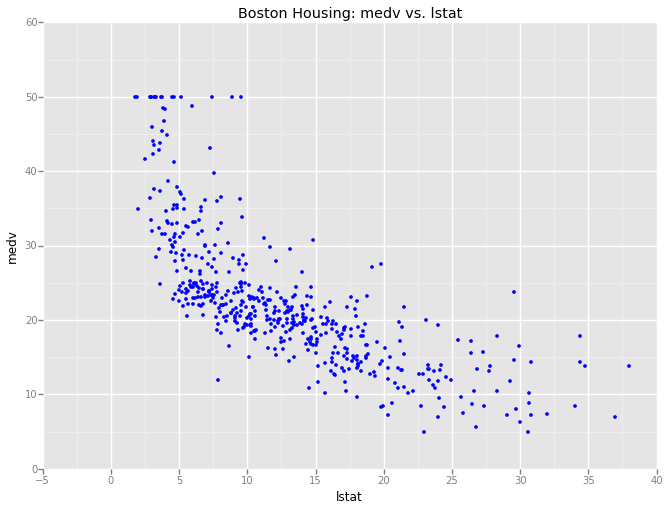

<ggplot: (28875310)>

In [41]:
def plot_boston_housing_data(boston_housing_data,
                             x_name='lstat', y_name='medv', y_hat_name='predicted_medv',
                             title='Boston Housing: medv vs. lstat',
                             plot_predicted=True):
    g = ggplot(aes(x=x_name, y=y_name), data=boston_housing_data) +\
        geom_point(size=10, color='blue') +\
        ggtitle(title) +\
        xlab(x_name) + ylab(y_name)
    if plot_predicted:
        g += geom_line(aes(x=x_name, y=y_hat_name), size=2, color='darkorange')
    return g

plot_boston_housing_data(boston_housing, plot_predicted=False)

# $k$-Nearest Neighbors algorithm and Bias-Variance Trade-Off

Let's now try fitting a KNN predictor, with $k = 5$, of _medv_ from _lstat_, using all samples:

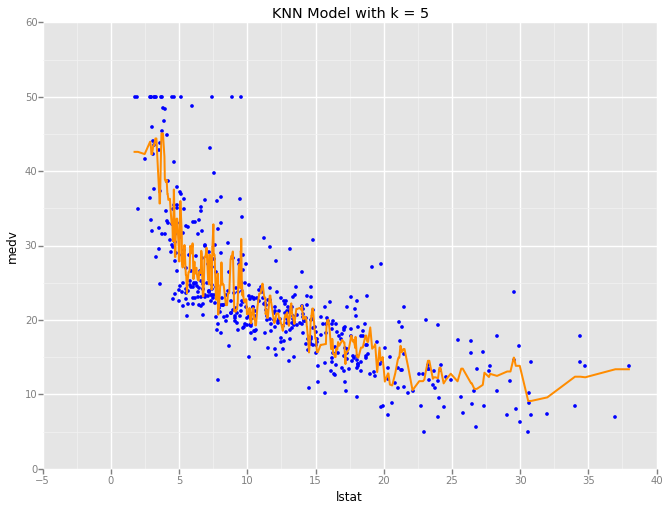

<ggplot: (34323772)>

In [42]:
k = 5
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X=boston_housing[['lstat']], y=boston_housing.medv)
boston_housing['predicted_medv'] = knn_model.predict(boston_housing[['lstat']])

plot_boston_housing_data(boston_housing, title='KNN Model with k = %i' %k)

With $k = 5$ &ndash; a small number of nearest neighbors &ndash; we have a very "squiggly" predictor, which **fits the training data well** but is **over-sensitive to small changes** in the _lstat_ variable. We call this a **LOW-BIAS**, **HIGH-VARIANCE** predictor. We don't like it.

Now, with, say, $k = 200$, we have the following:

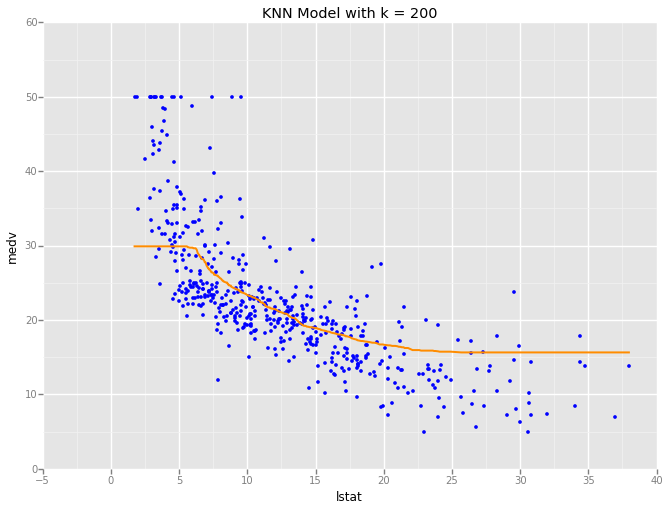

<ggplot: (33629111)>

In [43]:
k = 200
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X=boston_housing[['lstat']], y=boston_housing.medv)
boston_housing['predicted_medv'] = knn_model.predict(boston_housing[['lstat']])

plot_boston_housing_data(boston_housing, title='KNN Model with k = %i' % k)

_Meh..._, we're not exactly jumping around with joy with this one, either. The predictor line is **not over-sensitive**, but **too "smooth" and too simple**, **not responding sufficiently to significant changes** in _lstat_. We call this a **HIGH-BIAS, LOW-VARIANCE** predictor.

Let's try something in between, say, $k = 50$, to see if we have any better luck:

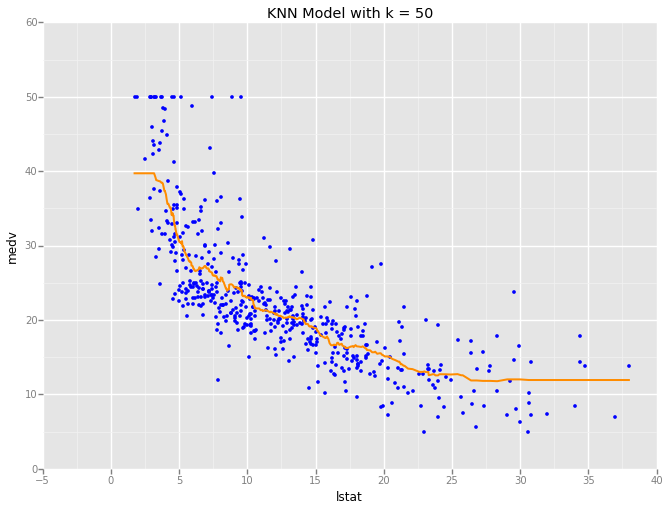

<ggplot: (34425134)>

In [44]:
k = 50
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X=boston_housing[['lstat']], y=boston_housing.medv)
boston_housing['predicted_medv'] = knn_model.predict(boston_housing[['lstat']])

plot_boston_housing_data(boston_housing, title='KNN Model with k = %i' % k)

Now, this looks pretty reasonable, and we'd think this predictor would **generalize well** when facing new, not yet seen, data. This is a **low-bias**, **low-variance** predictor. We love ones like this.

Hence, the key take-away is that, throughout a range of **hyper-parameter** $k$ from small to large, we have seen a spectrum of corresponding predictors from "low-bias high-variance" to "high-bias low-variance". This phenomenon is called the **BIAS-VARIANCE TRADE OFF**, a fundamental concept in Machine Learning that is applicable to not only KNN alone but to all modeling methods.

The bias-variance trade-off concerns the **generalizability of a trained predictor** in light of new data it's not seen before. If a predictor has high bias and/or high variance, it will not do well in new cases. **Good, generalizable predictors** need to have **both low bias and low variance**.

# Out-of-Sample Error and Cross-Validation

To **quantify the generalizability of a predictor**, we need to estimate its **out-of-sample (OOS) error**, i.e. a certain measure of **how well the predictor performs on data not used in its training process**.

A popular way to produce such OOS error estimates is to perform **cross validation**. Refer to lecture slides or <a href="http://en.wikipedia.org/wiki/Cross-validation_(statistics)">here</a> for discussions on cross validation.

Now, let's consider [**Root Mean Square Error** (**RMSE**)](http://en.wikipedia.org/wiki/Root-mean-square_deviation) as our predictor-goodness evaluation criterion and use **5-fold** cross validation **6 times** to pick a KNN predictor that has satisfactory RMSE.

In [45]:
# define Root-Mean-Square-Error scoring/evaluation function
# compliant with what SciKit Learn expects in this guide:
# http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html#sklearn.cross_validation.cross_val_score
def rmse_score(estimator, X, y):
    y_hat = estimator.predict(X)
    return rmse(y_hat, y)

NB_CROSS_VALIDATION_FOLDS = 5
NB_CROSS_VALIDATIONS = 6

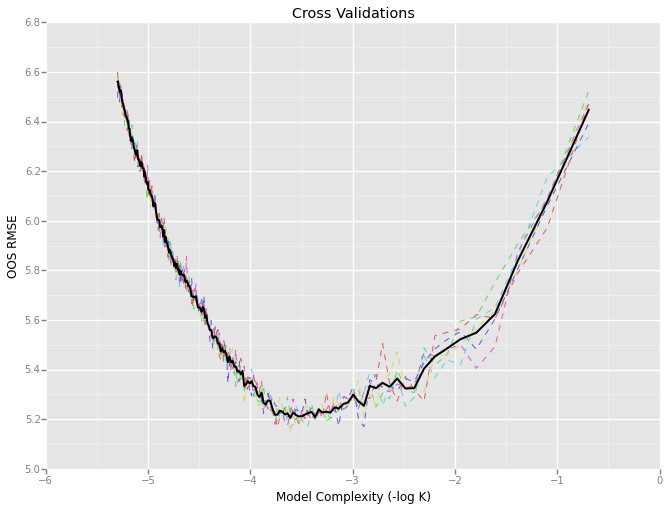

<ggplot: (34332802)>

In [46]:
k_range = range(2, 201)
cross_validations_avg_rmse_dataframe = DataFrame(dict(k=k_range, model_complexity=-log(k_range)))
cross_validations_avg_rmse_dataframe['cv_avg_rmse'] = 0.
cv_column_names = []
for v in range(NB_CROSS_VALIDATIONS):
    cv_column_name = 'cv_%i_rmse' % v
    cv_column_names.append(cv_column_name)
    cross_validations_avg_rmse_dataframe[cv_column_name] = nan
    for k in k_range:
        knn_model = KNeighborsRegressor(n_neighbors=k)
        avg_rmse_score = cross_val_score(
            knn_model,
            X=boston_housing[['lstat']],
            y=boston_housing.medv,
            cv=KFold(n=nb_samples,
                     n_folds=NB_CROSS_VALIDATION_FOLDS,
                     shuffle=True),
            scoring=rmse_score).mean()
        cross_validations_avg_rmse_dataframe.ix[
            cross_validations_avg_rmse_dataframe.k==k, cv_column_name] = avg_rmse_score
        
    cross_validations_avg_rmse_dataframe.cv_avg_rmse +=\
        (cross_validations_avg_rmse_dataframe[cv_column_name] -
         cross_validations_avg_rmse_dataframe.cv_avg_rmse) / (v + 1)
        
cross_validations_avg_rmse_longdataframe = melt(
    cross_validations_avg_rmse_dataframe,
    id_vars=['model_complexity', 'cv_avg_rmse'], value_vars=cv_column_names)

ggplot(aes(x='model_complexity', y='value', color='variable'),
       data=cross_validations_avg_rmse_longdataframe) +\
    geom_line(size=1, linetype='dashed') +\
    geom_line(aes(x='model_complexity', y='cv_avg_rmse'),
              data=cross_validations_avg_rmse_longdataframe,
              size=2, color='black') +\
    ggtitle('Cross Validations') +\
    xlab('Model Complexity (-log K)') + ylab('OOS RMSE')

Best $k$ that minimizes average cross-validation RMSE:

In [47]:
best_k_index = cross_validations_avg_rmse_dataframe.cv_avg_rmse.argmin()
best_k = k_range[best_k_index]
best_k

37

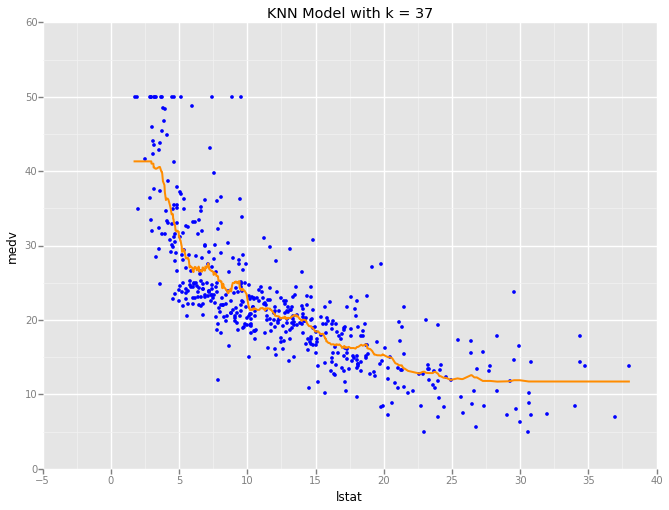

<ggplot: (29030201)>

In [48]:
k = best_k
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X=boston_housing[['lstat']], y=boston_housing.medv)
boston_housing['predicted_medv'] = knn_model.predict(boston_housing[['lstat']])

plot_boston_housing_data(boston_housing, title='KNN Model with k = %i' % k)